In [27]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
os.getcwd()

'/Users/ryanfisher/Documents/Springboard/Springboard/Data Vis'

In [33]:
os.listdir()

['.DS_Store',
 'Chicago_Crimes_2008_to_2011.csv',
 'Data Visualization Exercise.ipynb',
 'Chicago_Crimes_2001_to_2004.csv',
 'Chicago_Crimes_2012_to_2017.csv',
 'archive-3',
 'Chicago_Crimes_2005_to_2007.csv',
 '.ipynb_checkpoints']

In [189]:
crime = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', header=0)
#crime.head()

In [190]:
del crime['Unnamed: 0']

In [191]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [155]:
crime.shape

(1456714, 21)

In [192]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [157]:
crime['Primary Type'].value_counts()

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

In [158]:
crime['Community Area'].value_counts()

25.0    94730
8.0     50290
43.0    48909
23.0    47093
29.0    46151
        ...  
55.0     3209
12.0     2543
47.0     2197
9.0      1433
0.0        13
Name: Community Area, Length: 78, dtype: int64

In [159]:
com_area = pd.read_csv('CommAreas.csv', header=0)

In [188]:
com_area.head()

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,Community Area,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,"46,004,621.1581","31,027.0545098"
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,"16,913,961.0408","19,565.5061533"
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,"19,916,704.8692","25,339.0897503"
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,"48,492,503.1554","28,196.8371573"
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,"29,071,741.9283","23,325.1679062"


In [193]:
com_area.rename({'AREA_NUMBE':'Community Area'},axis=1,inplace=True)

In [194]:
inner_join= pd.merge(crime,  
                      com_area[['Community Area','COMMUNITY']],  
                      on ='Community Area',  
                      how ='left').set_index('Date')


In [195]:
crime = inner_join

In [196]:
crime['COMMUNITY'].value_counts()

AUSTIN             94730
NEAR NORTH SIDE    50290
SOUTH SHORE        48909
HUMBOLDT PARK      47093
NORTH LAWNDALE     46151
                   ...  
MONTCLARE           3231
HEGEWISCH           3209
FOREST GLEN         2543
BURNSIDE            2197
EDISON PARK         1433
Name: COMMUNITY, Length: 77, dtype: int64

In [82]:
series['Date'] = pd.to_datetime(series['Date'], format='%m/%d/%Y %I:%M:%S %p')


/Users/ryanfisher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


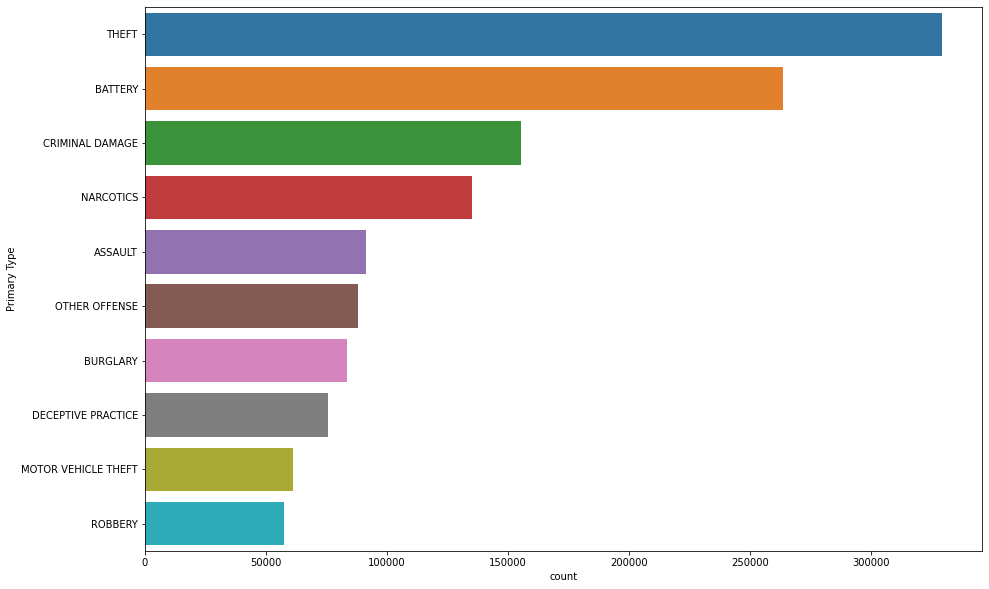

In [197]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = crime, order = crime['Primary Type'].value_counts().iloc[:10].index)

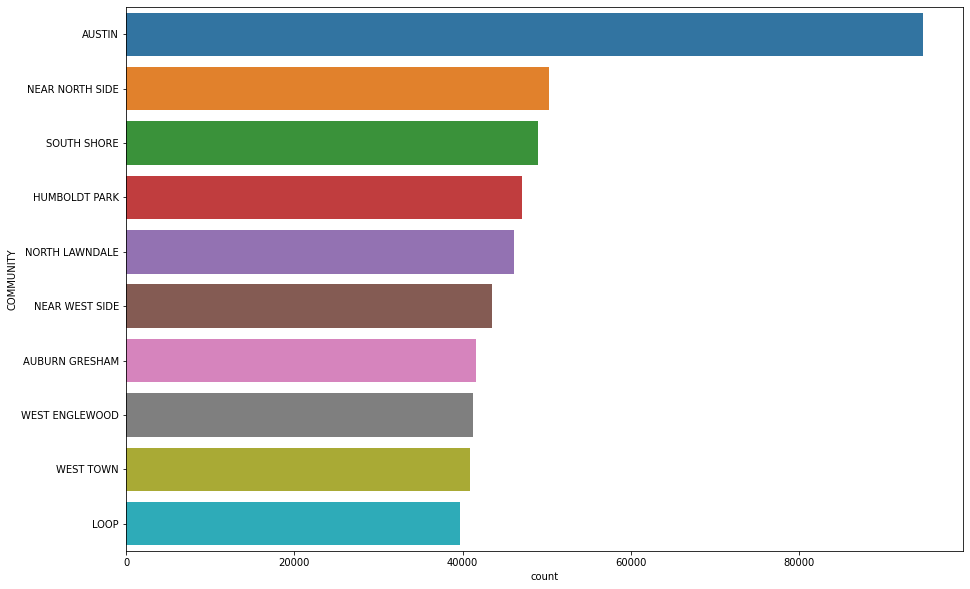

In [198]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'COMMUNITY', data = crime, order = crime['COMMUNITY'].value_counts().iloc[:10].index)

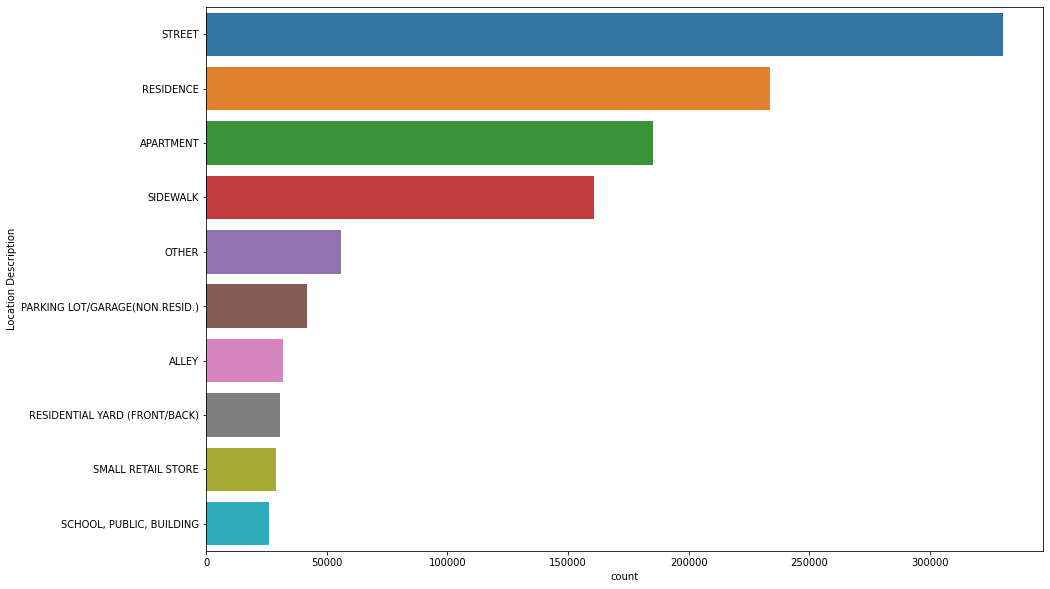

In [199]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = crime, order = crime['Location Description'].value_counts().iloc[:10].index)

In [200]:
crime_austin = crime.loc[crime['COMMUNITY'] == 'AUSTIN']

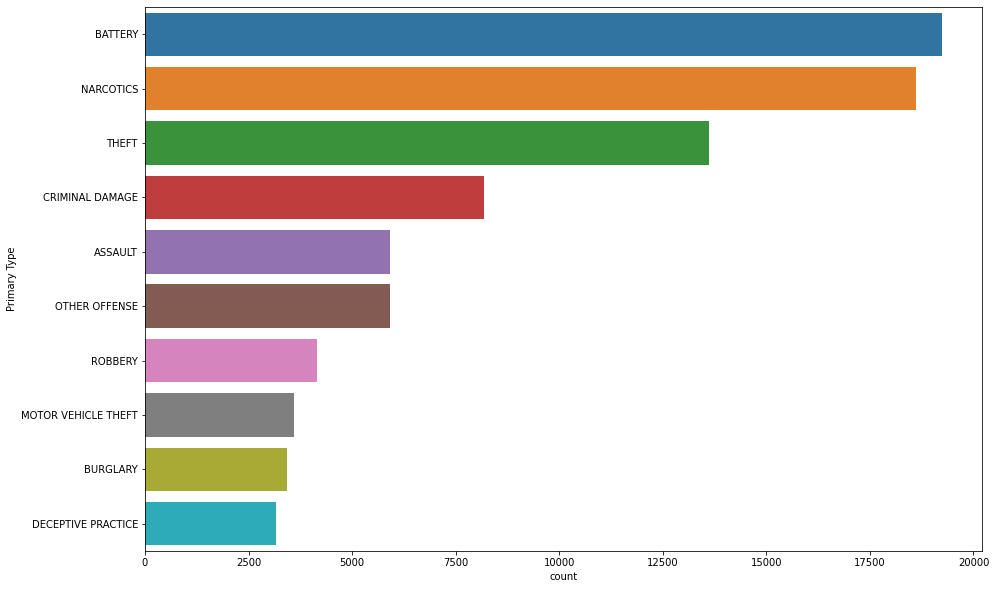

In [201]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = crime_austin, order = crime_austin['Primary Type'].value_counts().iloc[:10].index)

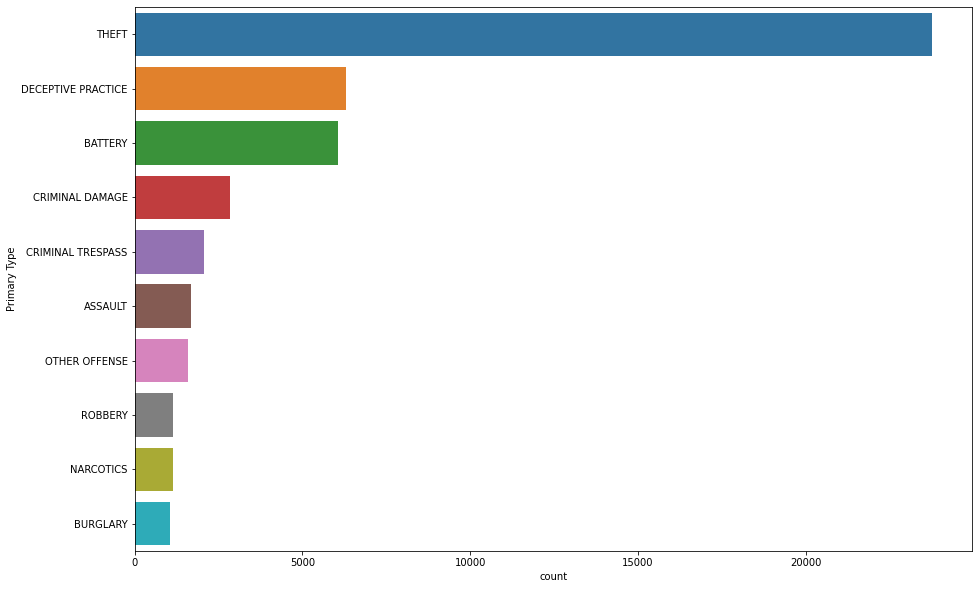

In [202]:
crime_near_north = crime.loc[crime['COMMUNITY'] == 'NEAR NORTH SIDE']
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = crime_near_north, order = crime_near_north['Primary Type'].value_counts().iloc[:10].index)

In [205]:
crime

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,COMMUNITY
Date,,,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,...,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",NORTH LAWNDALE
05/03/2016 09:40:00 PM,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,...,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",WOODLAWN
05/03/2016 11:31:00 PM,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,...,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",AUSTIN
05/03/2016 10:10:00 PM,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,...,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",AUSTIN
05/03/2016 10:00:00 PM,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,...,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",AUSTIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05/03/2016 11:33:00 PM,10508679,HZ250507,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,...,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)",SOUTH LAWNDALE
05/03/2016 11:30:00 PM,10508680,HZ250491,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,...,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)",GREATER GRAND CROSSING
05/03/2016 12:15:00 AM,10508681,HZ250479,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,...,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)",CHICAGO LAWN


In [206]:
crime.index = pd.to_datetime(crime.index)

In [212]:
arrested = crime[crime['Arrest'] == True]['Arrest']
print(domestic_yearly.head())

Date
2016-05-03 23:40:00    True
2016-05-03 21:44:00    True
2016-05-03 23:11:00    True
2016-05-04 11:15:00    True
2016-05-04 11:30:00    True
Name: Arrest, dtype: bool


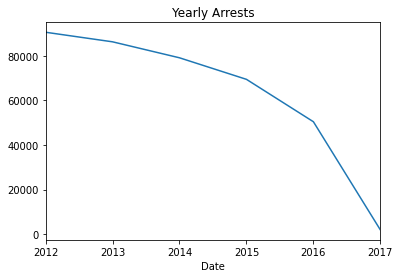

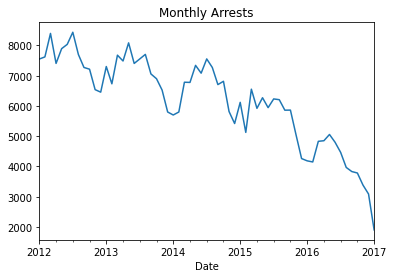

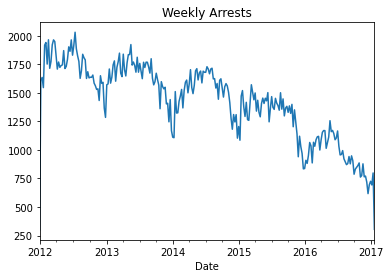

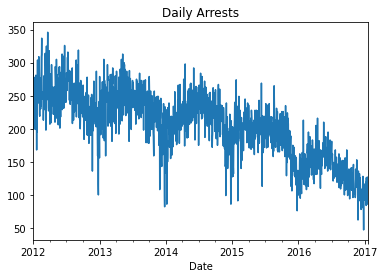

In [214]:
plt.subplot()
# yearly domestic violence
arrested.resample('A').sum().plot()
plt.title('Yearly Arrests')
plt.show()
# Monthly domestic violence
arrested.resample('M').sum().plot()
plt.title('Monthly Arrests')
plt.show()
# Weekly domestic violence
arrested.resample('W').sum().plot()
plt.title('Weekly Arrests')
plt.show()
# daily domestic violence
arrested.resample('D').sum().plot()
plt.title('Daily Arrests')
plt.show()
plt.show()